# Coefficient Shrinkage
$\providecommand{\bbeta}{\boldsymbol\beta}$
$\providecommand{\bx}{\boldsymbol x}$

The purpose of this library is to fit additive models
\begin{equation*}
E[Y | X=\bx] = \mu(\beta_1 h_1(\bx)+\dots+\beta_k h_k(\bx))
\end{equation*}
over dynamically created feature functions $f$ using the gradient boosting framework.

\begin{equation}
\mathcal{R}_\lambda(\bbeta; h) = \sum_{i=1}^n \ell(y_i, f(\bx_i)) + \lambda \Omega(\bbeta)
\end{equation}

One standard choice for the penalty term is $l2$-regularisation that uses $\Omega(\bbeta)=\|\bbeta\|_2$. This is very easy to implement for the weight fitting step, at least in the context of least-squares regression. However, as the penalty term is not directly given as a function of the model output, it is not straightforward to incorporate it into several of the standard objective functions in gradient boosting, because those are a function of the risk gradient of the model output (and not, at least not directly, of the coefficients).
As a consequence, those objective function overestimates the risk reduction achieved by terms that would get a very large unshrunken coefficient.

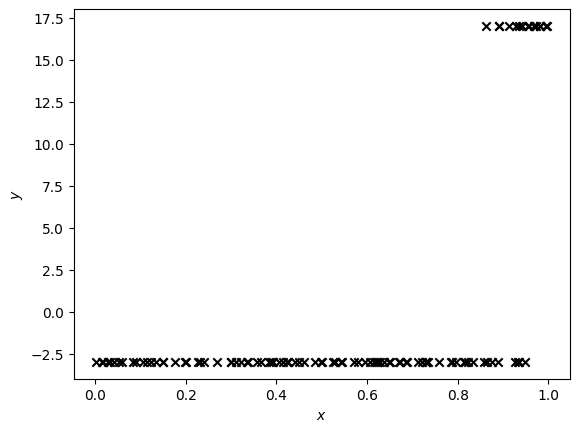

In [8]:
import numpy as np
from scipy.special import expit
from matplotlib import pyplot as plt

RNG = np.random.default_rng(seed=0)
x = RNG.uniform(size=100)
y = RNG.binomial(1, expit(50*(x-0.9))).reshape(-1)
y = 20*y
y = y - y.mean()

plt.scatter(x, y, marker='x', color='black')
plt.xlabel('$x$'); plt.ylabel('$y$')
plt.show()